![](https://entrackr.com/storage/2019/02/Amazon-1.jpg)


## About Dataset
### Context
>This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews
dataset_source= ['https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews']

In [ ]:
#!pip install tqdm

# **Importing Necessary Libraies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import  warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
colors = ['deeppink','royalblue','lightgreen','yellow','grey']

# **Loading and reading the Dataset**

In [2]:
dataset_path='Reviews.csv'
df = pd.read_csv(dataset_path)

df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...


In [ ]:
# To reduce computational time first 
df =df.head(10000)

# **Exploring the Dataset**

In [3]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               5
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [4]:
# we don't need 'ProfileName', 'Summary' 
df = df.drop(['ProfileName', 'Summary',],axis=1)

In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   HelpfulnessNumerator    50000 non-null  int64 
 4   HelpfulnessDenominator  50000 non-null  int64 
 5   Score                   50000 non-null  int64 
 6   Time                    50000 non-null  int64 
 7   Text                    50000 non-null  object
dtypes: int64(5), object(3)
memory usage: 3.1+ MB


In [7]:
df.duplicated().sum()

0

Score
5    62.260
4    14.576
1     9.442
3     8.094
2     5.628
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


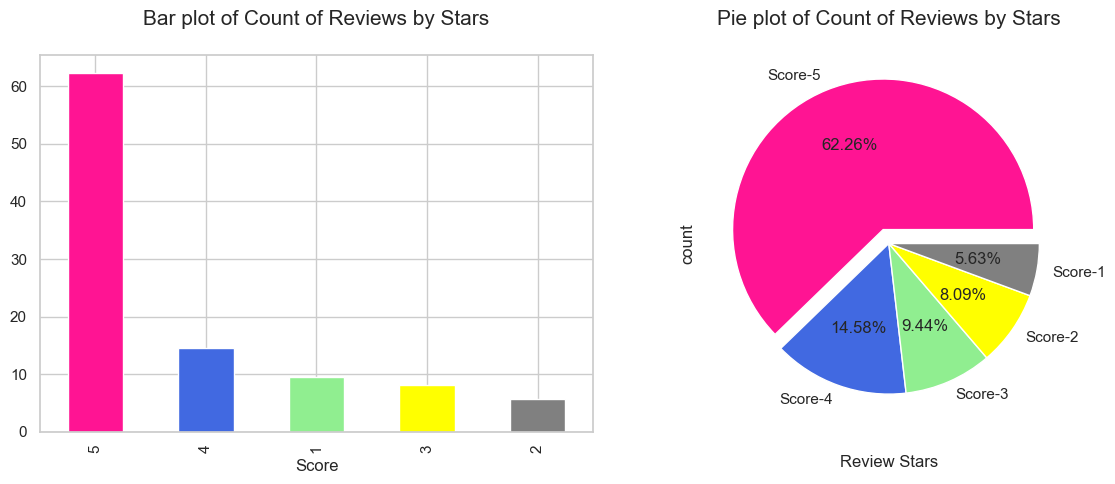

In [8]:
score_value_counts = df.Score.value_counts()*100/len(df)
print(score_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
score_value_counts.plot(kind='bar', color =colors, ax=axs[0] )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Score-5', 'Score-4', 'Score-3', 'Score-2','Score-1']
score_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.,0.,0.,0.],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()


In [9]:
#df.nunique().sort_values().plot(kind='bar')
df.nunique().sort_values()

Score                         5
HelpfulnessNumerator        106
HelpfulnessDenominator      110
Time                       2489
ProductId                  6115
UserId                    40048
Text                      46254
Id                        50000
dtype: int64

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords') # for pronouns
nltk.download('vader_lexicon') # for +ve and -ve words used for sentiment
nltk.download('punkt')  # For abbriviation  and any shortform
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
# nltk.data.path.append("/path/to/nltk_data")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!

True

# Text preprocessing
- [x] Removing non-alphabet characters
- [x] Convert to lowercase
- [x] Tokenization
- [x] selecting stopwords
- [x] Filtering stopwords (Remove stopwords using NLTK's English stopwords list)
- [x] Lemmitization (choosing root words ( removing suffixes or prefixes))


In [11]:

corpus = []

# Loop through each message in the df['Text']

for i in tqdm(range(len(df)), desc="Processing Text"):
    text = df['Text'][i]
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters 
    cleantext = cleaned_text.lower()              # Convert to lowercase
    words = word_tokenize(cleantext)  # selecting words
    stop_words = set(stopwords.words('english')) # unique stopwords
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords using NLTK's English stopwords list

    lemmatizer = WordNetLemmatizer()
    lemmatized_word = [lemmatizer.lemmatize(word) for word in filtered_words]  # root form ( removing suffixes or prefixes)
    processed_text = ' '.join(lemmatized_word)  # Join the words back into a sentence
#     ps = PorterStemmer()
#     stem_words = [ps.stem(word) for word in filtered_words] 
#     processed_text = ' '.join(stem_words)  # Join the words back into a sentence
    corpus.append(processed_text)

Processing Text:   0%|          | 0/50000 [00:00<?, ?it/s]

In [12]:
df['processed_text'] = corpus
df

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,processed_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,0,0,5,1261180800,My sister introduced me to these. They have be...,sister introduced become favorite carry around...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,0,0,5,1258934400,A friend recommended these bars and I fell in ...,friend recommended bar fell love great price e...
49997,49998,B00430B73W,A2QH2KF2IAB143,0,0,5,1257379200,Fabulous! I take one to work with me every da...,fabulous take one work every day feel deprived...
49998,49999,B00430B73W,AMX286UGXISMA,0,0,4,1247702400,I love these bars and will continue to buy the...,love bar continue buy beware occasionally cont...


# Sentiment Analysis using Vader

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
example = df['processed_text'][0]
example

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better'

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9413}

In [17]:
# res = {} # initialising an empty dictionary to store sentiment score

# for index, row in df.iterrows():
# #     text = row['Text']
#     text = row['processed_text']
#     res[index] = sia.polarity_scores(text)


In [18]:
res = {} # initialising an empty dictionary to store sentiment score
for index,row in tqdm(df.iterrows(),total= len(df)):
    text = row['processed_text']
    res[index] = sia.polarity_scores(text)


  0%|          | 0/50000 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.132,0.576,0.292,0.8624
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468
...,...,...,...,...
49995,0.000,0.552,0.448,0.9279
49996,0.000,0.345,0.655,0.9808
49997,0.200,0.581,0.219,0.0772
49998,0.073,0.628,0.298,0.6486


In [20]:
vaders.shape

(50000, 4)

In [21]:
df.shape

(50000, 9)

In [22]:
new_df = pd.concat([vaders,df], axis=1)
new_df

,neg,neu,pos,compound,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,processed_text
0,0.000,0.503,0.497,0.9413,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,0.129,0.762,0.110,-0.1027,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,0.132,0.576,0.292,0.8624,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,0.000,0.854,0.146,0.4404,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,0.000,0.369,0.631,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000,0.552,0.448,0.9279,49996,B00430B73W,AKW867T7C6HF8,0,0,5,1261180800,My sister introduced me to these. They have be...,sister introduced become favorite carry around...
49996,0.000,0.345,0.655,0.9808,49997,B00430B73W,A2PEHNEDMHOYTW,0,0,5,1258934400,A friend recommended these bars and I fell in ...,friend recommended bar fell love great price e...
49997,0.200,0.581,0.219,0.0772,49998,B00430B73W,A2QH2KF2IAB143,0,0,5,1257379200,Fabulous! I take one to work with me every da...,fabulous take one work every day feel deprived...
49998,0.073,0.628,0.298,0.6486,49999,B00430B73W,AMX286UGXISMA,0,0,4,1247702400,I love these bars and will continue to buy the...,love bar continue buy beware occasionally cont...


In [23]:
new_df.Score.value_counts()

Score
5    31130
4     7288
1     4721
3     4047
2     2814
Name: count, dtype: int64

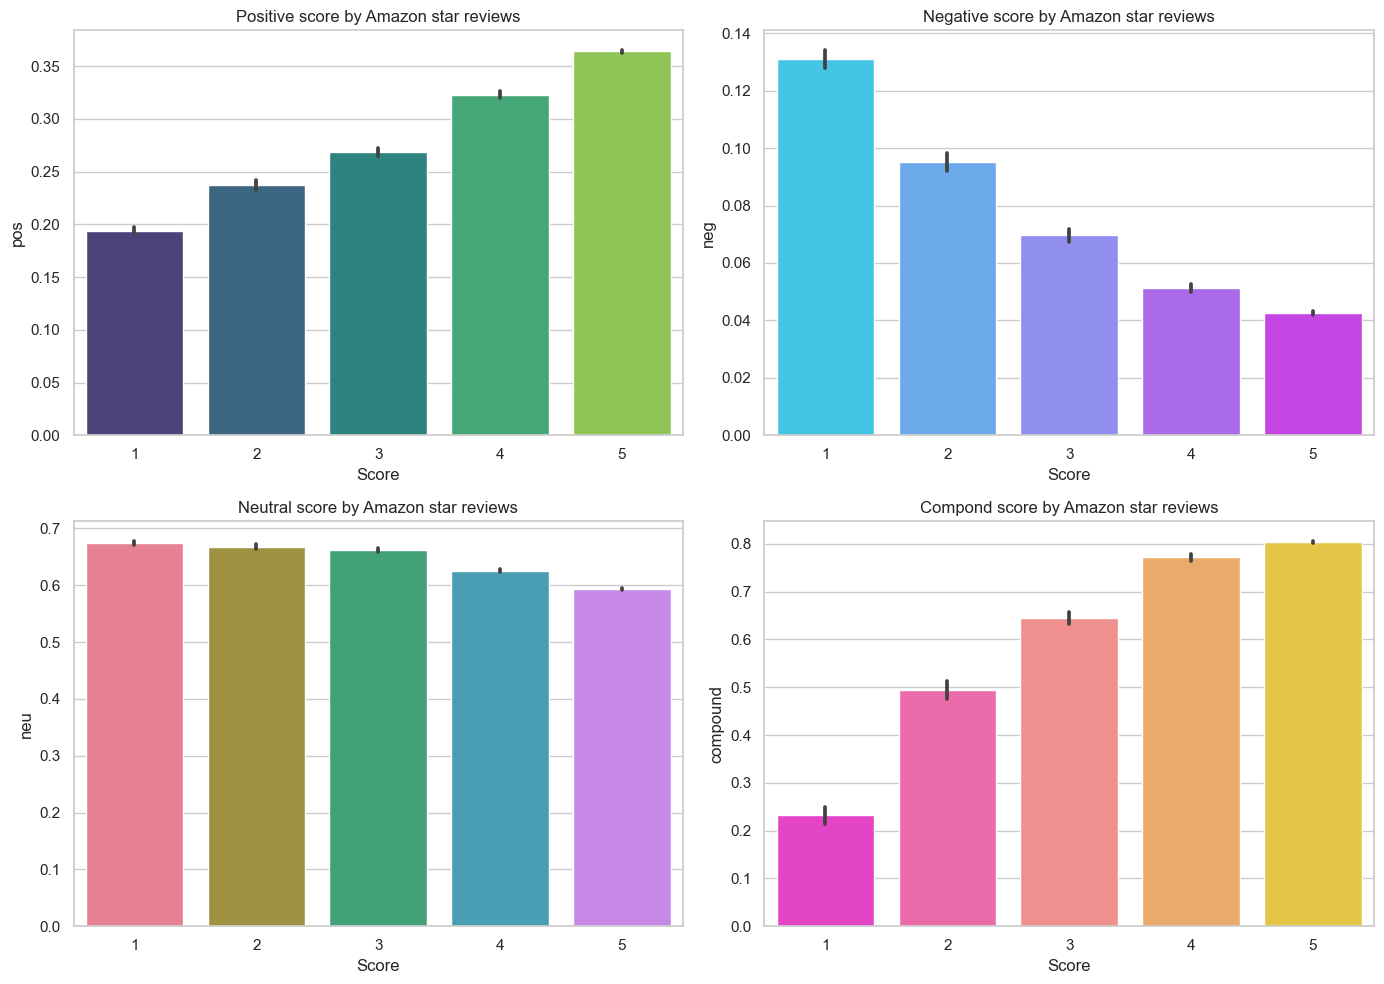

In [24]:
plt.figure(figsize =(14,10))
plt.subplot(221)
sns.barplot(data = new_df, x='Score', y='pos', palette='viridis' )
plt.title('Positive score by Amazon star reviews')
plt.subplot(222)
sns.barplot(data = new_df, x='Score', y='neg',palette='cool')
plt.title('Negative score by Amazon star reviews')
plt.subplot(223)
sns.barplot(data = new_df, x='Score', y='neu',palette='husl')
plt.title('Neutral score by Amazon star reviews')
plt.subplot(224)
sns.barplot(data = new_df, x='Score', y='compound',palette='spring')
plt.title('Compond score by Amazon star reviews')
plt.tight_layout()
plt.show()

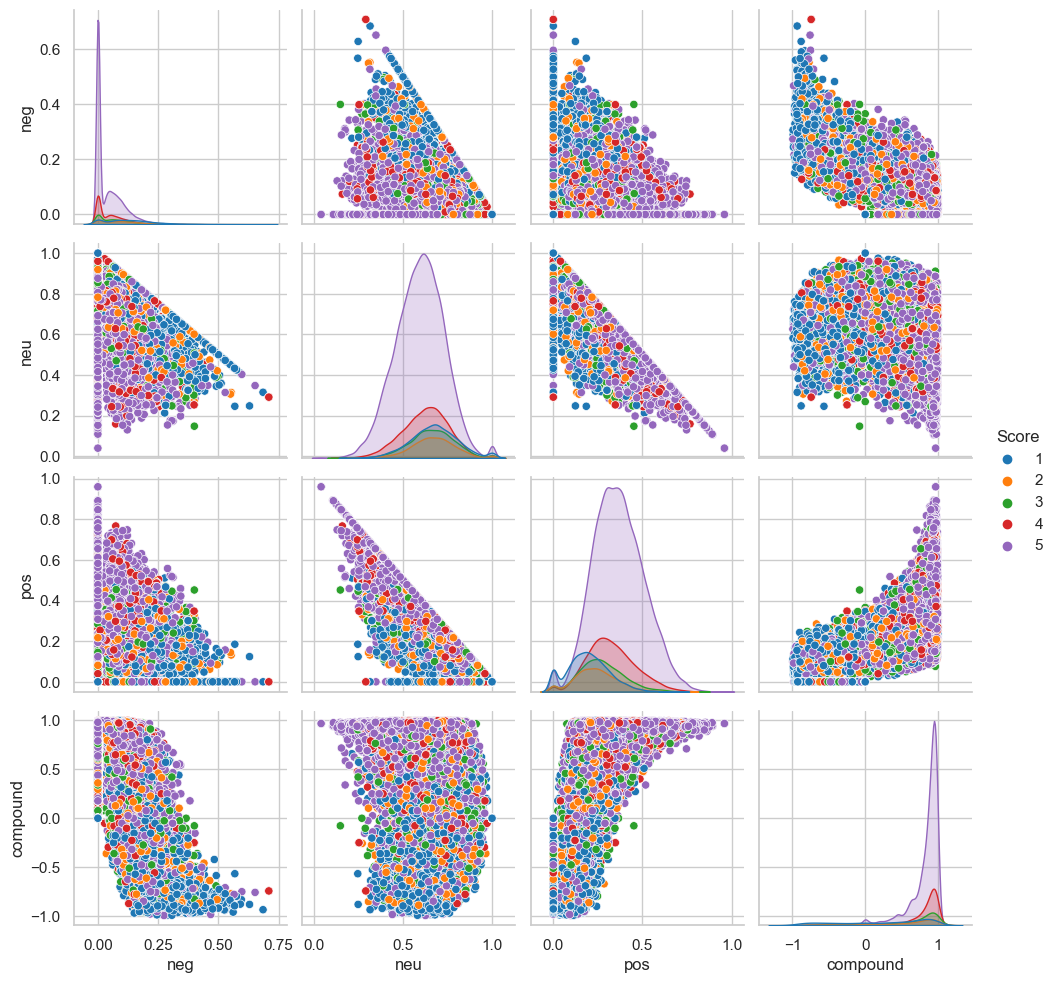

In [25]:
sns.pairplot(data= new_df, vars=['neg', 'neu','pos', 'compound'], hue= 'Score', palette='tab10')

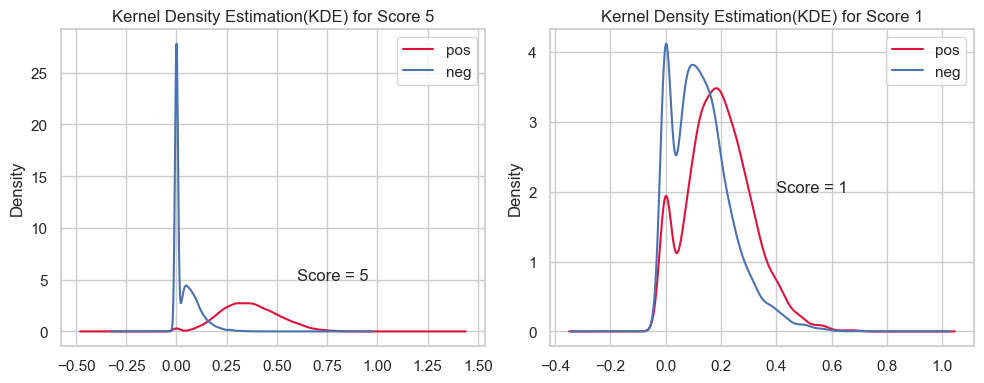

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
new_df[new_df.Score ==5].sort_values('pos', ascending= False)[['pos']].plot(kind='kde',ax=ax[0], color = 'crimson')
new_df[new_df.Score ==5].sort_values('neg', ascending= False)[['neg']].plot(kind='kde' ,ax=ax[0])
ax[0].set_title('Kernel Density Estimation(KDE) for Score 5')
ax[0].text(0.6, 5.0, 'Score = 5', )
new_df[new_df.Score ==1].sort_values('pos', ascending= False)[['pos']].plot(kind='kde',ax=ax[1],  color = 'crimson')
new_df[new_df.Score ==1].sort_values('neg', ascending= False)[['neg']].plot(kind='kde',ax=ax[1])
ax[1].set_title('Kernel Density Estimation(KDE) for Score 1')
ax[1].text(0.4, 2.0, 'Score = 1', )
plt.tight_layout()
plt.show()

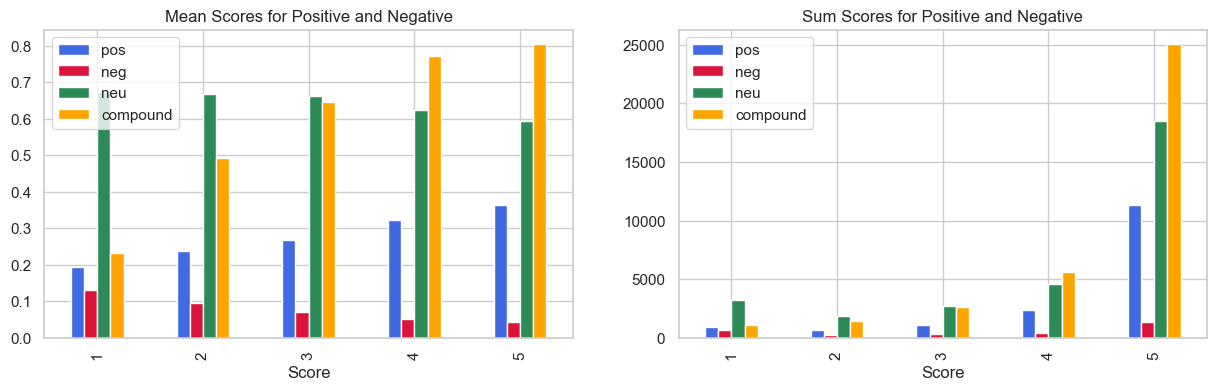

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
colors=[ 'royalblue','crimson','seagreen','orange']

new_df.groupby('Score')[['pos', 'neg','neu','compound']].mean().plot(kind='bar', color=colors,ax = ax[0] )
ax[0].set_title('Mean Scores for Positive and Negative')

new_df.groupby('Score')[['pos', 'neg','neu', 'compound']].sum().plot(kind='bar', color=colors, ax =ax[1])
ax[1].set_title('Sum Scores for Positive and Negative')
plt.title
plt.show()


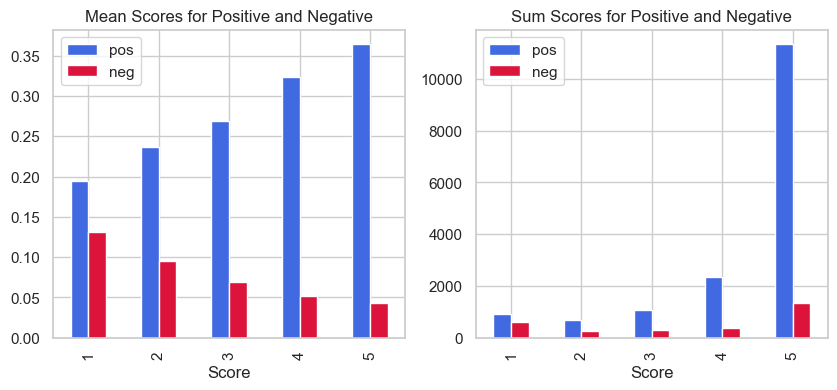

            pos       neg       neu        pos       neg        neu
Score                                                              
1      0.194042  0.131213  0.674743    916.070   619.458   3185.464
2      0.237053  0.095227  0.667721    667.067   267.968   1878.966
3      0.268776  0.069578  0.661644   1087.737   281.582   2677.673
4      0.323160  0.051383  0.625457   2355.189   374.478   4558.328
5      0.364025  0.042672  0.593304  11332.090  1328.382  18469.568



In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

new_df.groupby('Score')[['pos', 'neg']].mean().plot(kind='bar', color=colors,ax = ax[0] )
ax[0].set_title('Mean Scores for Positive and Negative')

new_df.groupby('Score')[['pos', 'neg']].sum().plot(kind='bar', color=colors, ax =ax[1])
ax[1].set_title('Sum Scores for Positive and Negative')
plt.title
plt.show()
print(pd.concat([new_df.groupby('Score')[['pos', 'neg','neu']].mean(),new_df.groupby('Score')[['pos', 'neg','neu']].sum()], axis=1))
print()

Score
5    62.260
4    14.576
1     9.442
3     8.094
2     5.628
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


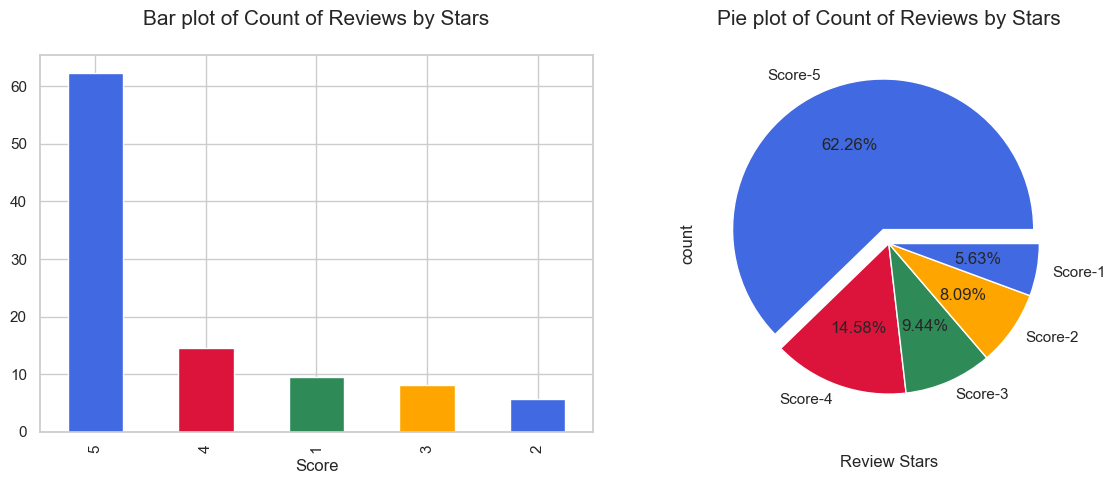

In [29]:
score_value_counts = (new_df[new_df['pos']>=0]['Score']).value_counts()*100/len(df)
print(score_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
score_value_counts.plot(kind='bar', color =colors, ax=axs[0] )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Score-5', 'Score-4', 'Score-3', 'Score-2','Score-1']
score_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.,0.,0.,0.],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=400,
               min_font_size=2,
               max_font_size=100,
               min_word_length=3,
               max_words=100,               
               background_color='black',
               colormap='coolwarm'
              )
wc1 = WordCloud(width=800,
               height=400,
               min_font_size=5,
               max_font_size=100,
               min_word_length=3,
               max_words=100,               
               background_color='midnightblue',
               colormap='spring_r'
              )

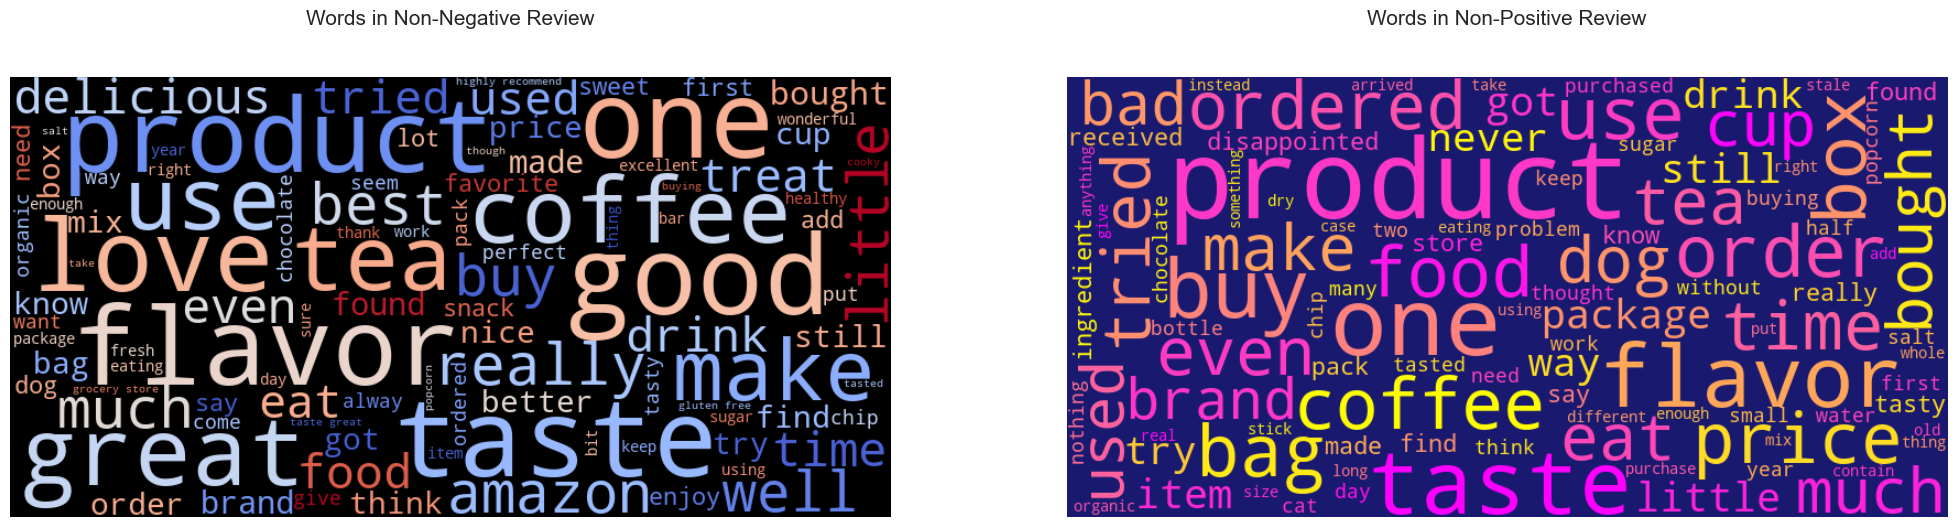

In [31]:

plt.figure(figsize=(25, 8))
plt.subplot(121)
wc_pos = wc.generate(new_df[new_df['neg']==0]['processed_text'].str.cat(sep = " "))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Non-Negative Review\n\n', fontsize=15)

plt.subplot(122)

wc_neg = wc1.generate(new_df[new_df['pos']==0]['processed_text'].str.cat(sep = " "))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Non-Positive Review\n\n', fontsize=15)
plt.show()


In [32]:
df1= new_df.copy()
negative_condition = ((df1['pos'] == 0) & (df1['neg']!=0))
positive_condition = ((df1['pos'] != 0) & (df1['neg']==0))
neutral_condition = ((df1['pos'] != 0) & (df1['neg']!=0) | (df1['pos'] == 0) & (df1['neg']==0) )


conditions = [negative_condition, positive_condition, neutral_condition]
values = ['neg', 'pos', 'neu']

df1['sentiment'] = np.select(conditions, values)


In [33]:
df1.sentiment.value_counts()


sentiment
neu    27576
pos    21694
neg      730
Name: count, dtype: int64

sentiment
neu    55.152
pos    43.388
neg     1.460
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


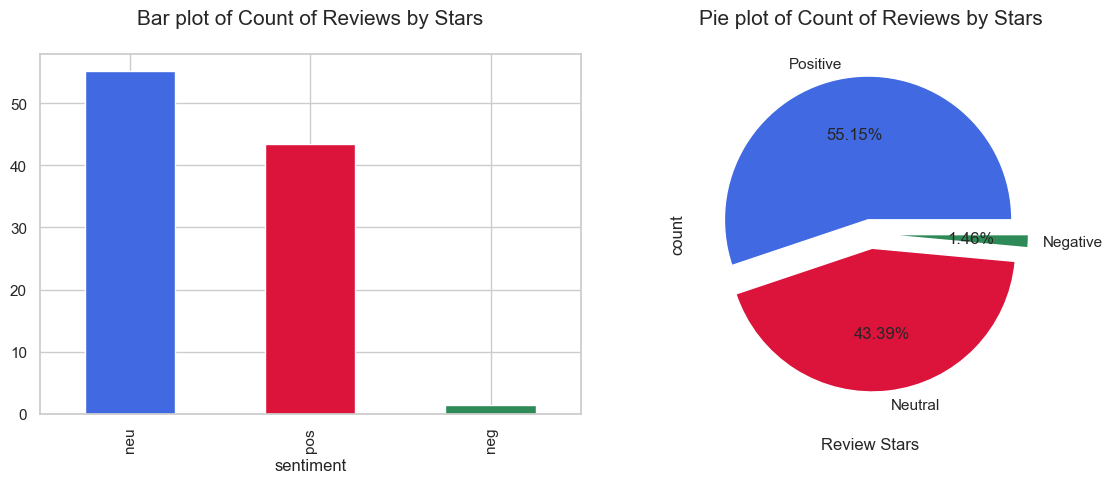

In [34]:
sentiment_value_counts = df1.sentiment.value_counts()*100/len(df)
print(sentiment_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
sentiment_value_counts.plot(kind='bar', color =colors, ax=axs[0], )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Positive','Neutral','Negative']
sentiment_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.1,0.1],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()

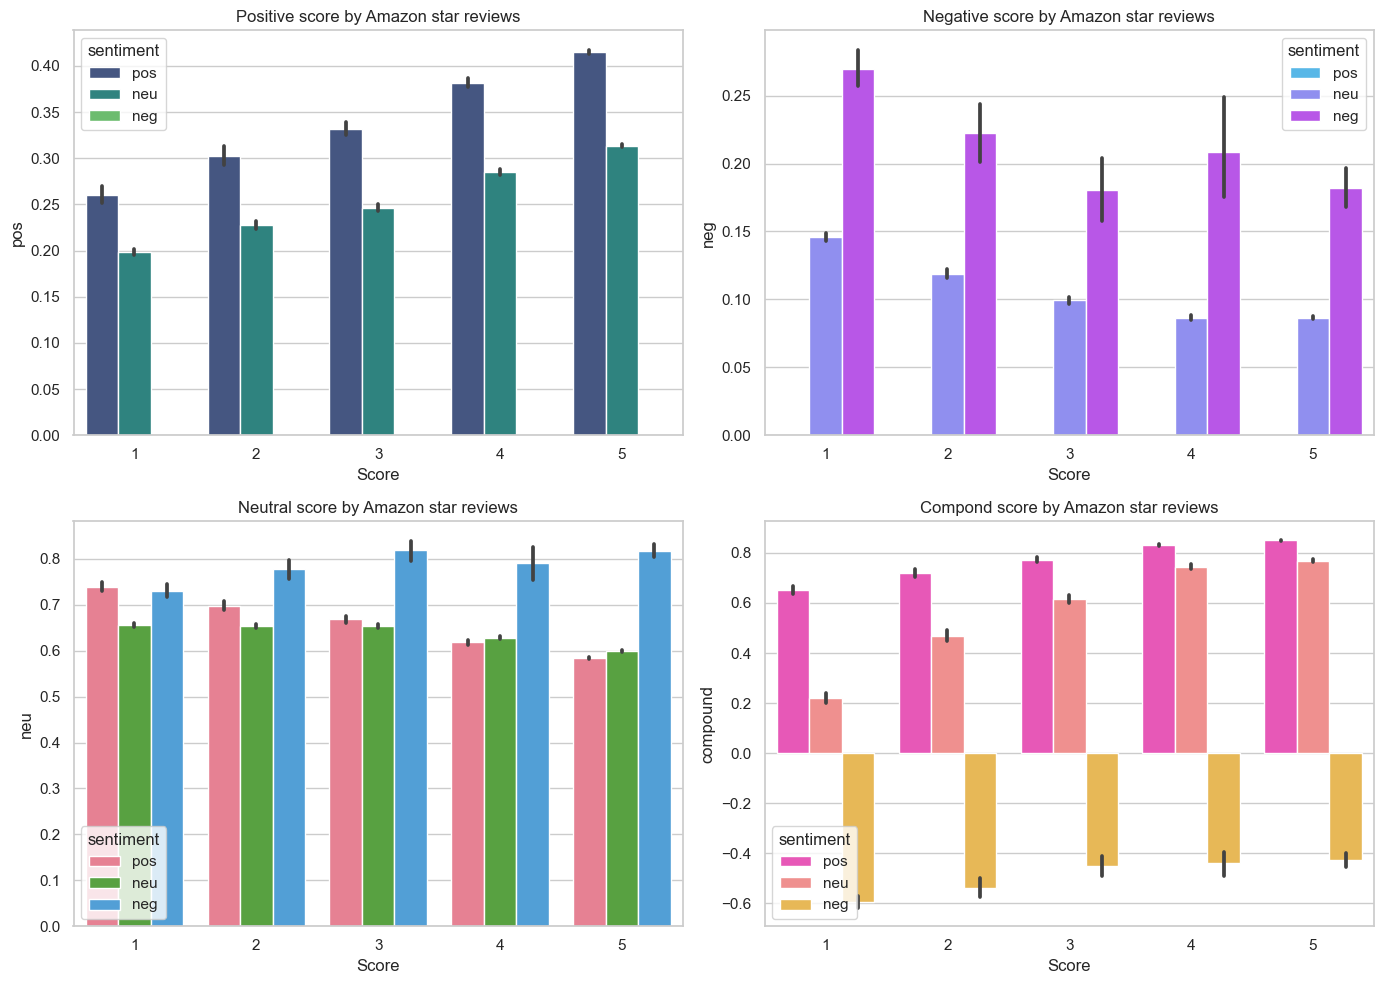

In [35]:
plt.figure(figsize =(14,10))
plt.subplot(221)
sns.barplot(data = df1, x='Score', y='pos', palette='viridis', hue= 'sentiment' )
plt.title('Positive score by Amazon star reviews')
plt.subplot(222)
sns.barplot(data = df1, x='Score', y='neg',palette='cool',hue= 'sentiment')
plt.title('Negative score by Amazon star reviews')
plt.subplot(223)
sns.barplot(data = df1, x='Score', y='neu',palette='husl', hue= 'sentiment')
plt.title('Neutral score by Amazon star reviews')
plt.subplot(224)
sns.barplot(data = df1, x='Score', y='compound',palette='spring', hue= 'sentiment')
plt.title('Compond score by Amazon star reviews')
plt.tight_layout()
plt.show()

# Model Building

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve,roc_auc_score, auc

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vc = CountVectorizer()
feature = vc.fit_transform(new_df['processed_text']).toarray()
print(feature.shape)
feature

(50000, 34297)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# Define a function to convert values
def convert_score(score):
    if score >= 3:
        return 1
    else:
        return 0

new_df['Score'] = new_df['Score'].apply(convert_score)
new_df['Score'].unique()

array([1, 0], dtype=int64)

<Axes: ylabel='count'>

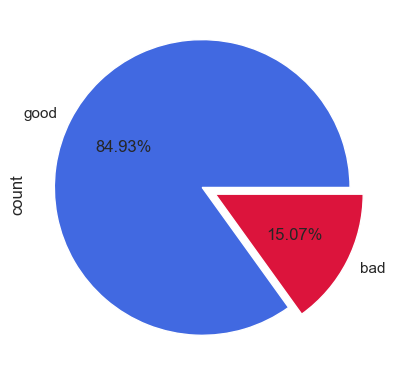

In [39]:
new_score_count =new_df['Score'].value_counts()*100/len(new_df)

new_score_count.plot.pie(autopct='%1.2f%%',labels=['good','bad'], colors=colors, explode=[0.1,0.],)

In [40]:
x=feature
y=new_df['Score']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=121, stratify=y)

In [42]:
mnb=MultinomialNB()
gnb= GaussianNB()
bnb=BernoulliNB()

models =[('MultinomialNB', mnb),('GaussianNB',gnb), ('BernoulliNB',bnb)]

from tabulate import tabulate
print(tabulate(models, headers=['Model name', 'Sklearn models']),)

Model name     Sklearn models
-------------  ----------------
MultinomialNB  MultinomialNB()
GaussianNB     GaussianNB()
B              e


In [46]:

for model_name, model in tqdm(models, desc="Training Models"):
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print('==='*10)
    print(model_name)
    print('==='*10)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
    CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100

    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)

    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
        print(f'ATTENTION : The  {model_name} Model is overfitting')
        
    cm_test = confusion_matrix(y_test, y_pred_test)


    fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)  
    roc_auc = auc(fpr, tpr)

    print(f'Test confusion matrix :\n {cm_test}')
    print()
    print(f'Test ROC-AUC : {roc_auc:.2f}')
    
    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm_test, annot = True, cmap= 'Blues')
    plt.title(f'confusion_matrix_Test {model_name}')
   
    plt.subplot(1,2,2)   
    plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

    plt.plot([0, 1], [0, 1], 'r--', label='AUC = 0.5')

# Set labels and title

    plt.xlabel('False Positive Rate (FPR))')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
# Show the plot
    plt.show()

Training Models:   0%|          | 0/3 [00:00<?, ?it/s]

MultinomialNB


KeyboardInterrupt: 